In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def parse_if_number(s):
    try: return float(s)
    except: return True if s=="true" else False if s=="false" else s if s else None

def parse_ndarray(s):
    return np.fromstring(s, sep=' ') if s else None



In [6]:
aloha = pd.read_csv('results/aloha.csv', converters = {
    'attrvalue': parse_if_number,
    'binedges': parse_ndarray,
    'binvalues': parse_ndarray,
    'vectime': parse_ndarray,
    'vecvalue': parse_ndarray})


In [7]:
aloha.head()


,run,type,module,name,attrname,attrvalue,value,count,sumweights,mean,stddev,min,max,binedges,binvalues
0,MAM10-BMRELAY-2-20200812-04:55:10-18627,runattr,NaN,NaN,configname,MAM10-BMRELAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
1,MAM10-BMRELAY-2-20200812-04:55:10-18627,runattr,NaN,NaN,datetime,20200812-04:55:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
2,MAM10-BMRELAY-2-20200812-04:55:10-18627,runattr,NaN,NaN,experiment,MAM10-BMRELAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
3,MAM10-BMRELAY-2-20200812-04:55:10-18627,runattr,NaN,NaN,inifile,omnetpp.ini,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
4,MAM10-BMRELAY-2-20200812-04:55:10-18627,runattr,NaN,NaN,iterationvars,"$delta=0, $speedMps=14",NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None


In [8]:
allAttrs = aloha[(aloha.type == 'itervar')]['attrname'].unique()
allAttrs.sort()
allAttrs

array(['delta', 'speedMps'], dtype=object)

In [9]:
allRelayModes = aloha[(aloha['attrname'].str.contains('.app[0].relayMode', na=False, regex=False))]['attrvalue'].unique()
allRelayModes.sort()
allRelayModes

array(['"BMesh"', '"MAM"'], dtype=object)

In [10]:
allSpeeds = aloha[(aloha.attrname == 'speedMps')]['attrvalue'].unique()
allSpeeds.sort()
allSpeeds

array([2.0, 6.0, 14.0], dtype=object)

In [58]:
allDeltas = aloha[(aloha.attrname == 'delta')]['attrvalue'].unique()
allDeltas.sort()
allDeltas = allDeltas[1:]
allDeltas

array([2.0, 5.0, 10.0, 20.0, 50.0, 100.0, 500.0, 1000.0, 5000.0, 10000.0,
       15000.0, 20000.0], dtype=object)

In [12]:
dataByRun = aloha.groupby(['run'])
dataByRun.size()

run
MAM10-BMRELAY-0-20200812-04:55:02-18627      2521
MAM10-BMRELAY-1-20200812-04:55:08-18627      2521
MAM10-BMRELAY-2-20200812-04:55:10-18627      2521
MAM10-MAMRELAY-0-20200812-04:55:13-18639     2521
MAM10-MAMRELAY-1-20200812-04:55:17-18639     2521
                                            ...  
MAM50-MAMRELAY-5-20200812-04:34:58-18291    11483
MAM50-MAMRELAY-6-20200812-04:35:17-18291    11483
MAM50-MAMRELAY-7-20200812-04:35:56-18291    11483
MAM50-MAMRELAY-8-20200812-04:36:38-18291    11483
MAM50-MAMRELAY-9-20200812-04:36:59-18291    11483
Length: 112, dtype: int64

In [13]:

def findBluetoothRelayRun(speed, configName):
    def testA(x):
        bmeshMatch = x[(x['attrname'].str.contains('.app[0].relayMode', na=False, regex=False))]['attrvalue'].iloc[0] == '"BMesh"'
        speedMatch = x[(x.attrname == 'speedMps')]['attrvalue'].iloc[0] == speed
        configNameMatch = x[(x.attrname == 'configname')]['attrvalue'].iloc[0] == configName
    
        return bmeshMatch & speedMatch & configNameMatch

    s = pd.Series(dataByRun.apply(testA))
    s = s[s == True]
    if len(s) == 0:
        raise Exception("Bluetooth Relay run not found for speed=" + str(speed) + " configName=" + configName)
    if len(s) > 1:
        raise Exception("Bluetooth Relay run duplicate for speed=" + str(speed) + " configName=" + configName)
    return s.index[0]

findBluetoothRelayRun(speed=6, configName='MAM10-BMRELAY')



'MAM10-BMRELAY-1-20200812-04:55:08-18627'

In [36]:

def findMAMRelayRun(speed, delta, configName):
    def testA(x):
        bmeshMatch = x[(x['attrname'].str.contains('.app[0].relayMode', na=False, regex=False))]['attrvalue'].iloc[0] == '"MAM"'
        speedMatch = x[(x.attrname == 'speedMps')]['attrvalue'].iloc[0] == speed
        deltaMatch = x[(x.attrname == 'delta')]['attrvalue'].iloc[0] == delta
        configNameMatch = x[(x.attrname == 'configname')]['attrvalue'].iloc[0] == configName
    
        return bmeshMatch & speedMatch & deltaMatch & configNameMatch

    s = pd.Series(dataByRun.apply(testA))
    s = s[s == True]
    if len(s) == 0:
        raise Exception("MAM Relay run not found for speed=" + str(speed) + " delta=" + str(delta) + " configName=" + configName)
    if len(s) > 1:
        raise Exception("MAM Relay run duplicate for speed=" + str(speed) + " delta=" + str(delta) + " configName=" + configName)
    return s.index[0]

findMAMRelayRun(speed=6, delta=2, configName='MAM10-MAMRELAY')


'MAM10-MAMRELAY-1-20200812-04:55:17-18639'

In [38]:
def getRunData(run):
    return aloha[aloha.run == run]

getRunData(findBluetoothRelayRun(speed=6, configName='MAM10-BMRELAY'))

,run,type,module,name,attrname,attrvalue,value,count,sumweights,mean,stddev,min,max,binedges,binvalues
237,MAM10-BMRELAY-1-20200812-04:55:08-18627,runattr,NaN,NaN,configname,MAM10-BMRELAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
238,MAM10-BMRELAY-1-20200812-04:55:08-18627,runattr,NaN,NaN,datetime,20200812-04:55:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
239,MAM10-BMRELAY-1-20200812-04:55:08-18627,runattr,NaN,NaN,experiment,MAM10-BMRELAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
240,MAM10-BMRELAY-1-20200812-04:55:08-18627,runattr,NaN,NaN,inifile,omnetpp.ini,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
241,MAM10-BMRELAY-1-20200812-04:55:08-18627,runattr,NaN,NaN,iterationvars,"$delta=0, $speedMps=6",NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530370,MAM10-BMRELAY-1-20200812-04:55:08-18627,histogram,MAM10.collector1.app[0],endToEndDelay:histogram,NaN,None,NaN,2663.0,NaN,0.021299,0.017529,0.0,0.088385,"[0.0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006...","[200.0, 40.0, 117.0, 128.0, 60.0, 70.0, 96.0, ..."
530371,MAM10-BMRELAY-1-20200812-04:55:08-18627,attr,MAM10.collector1.app[0],endToEndDelay:histogram,interpolationmode,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
530372,MAM10-BMRELAY-1-20200812-04:55:08-18627,attr,MAM10.collector1.app[0],endToEndDelay:histogram,source,dataAge(packetReceived),NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
530373,MAM10-BMRELAY-1-20200812-04:55:08-18627,attr,MAM10.collector1.app[0],endToEndDelay:histogram,title,"end-to-end delay, histogram",NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None


In [15]:
aloha.iloc[1200:1205]


,run,type,module,name,attrname,attrvalue,value,count,sumweights,mean,stddev,min,max,binedges,binvalues
1200,MAM10-MAMRELAY-7-20200812-04:55:36-18639,itervar,NaN,NaN,speedMps,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
1201,MAM10-MAMRELAY-7-20200812-04:55:36-18639,param,NaN,NaN,*.host*.app[0].relayMode,"""MAM""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
1202,MAM10-MAMRELAY-7-20200812-04:55:36-18639,param,NaN,NaN,*.host*.app[0].delta,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
1203,MAM10-MAMRELAY-7-20200812-04:55:36-18639,param,NaN,NaN,*.collector*.mobility.speed,6mps,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
1204,MAM10-MAMRELAY-7-20200812-04:55:36-18639,param,NaN,NaN,*.host*.app[0].relayMode,"""BMesh""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None


In [16]:
aloha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560188 entries, 0 to 560187
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   run         560188 non-null  object 
 1   type        560188 non-null  object 
 2   module      551264 non-null  object 
 3   name        551264 non-null  object 
 4   attrname    392204 non-null  object 
 5   attrvalue   392204 non-null  object 
 6   value       155624 non-null  float64
 7   count       12360 non-null   float64
 8   sumweights  0 non-null       float64
 9   mean        7528 non-null    float64
 10  stddev      7528 non-null    float64
 11  min         7528 non-null    float64
 12  max         7528 non-null    float64
 13  binedges    10000 non-null   object 
 14  binvalues   10000 non-null   object 
dtypes: float64(7), object(8)
memory usage: 64.1+ MB


In [17]:
aloha.describe()

,value,count,sumweights,mean,stddev,min,max
count,1.556240e+05,12360.000000,0.0,7528.000000,7528.000000,7.528000e+03,7528.000000
mean,6.412836e+03,1612.795793,NaN,13.550403,37.583036,3.694268e-01,435.205936
std,1.408095e+05,2254.321490,NaN,65.279553,300.541773,1.482129e+00,4328.427671
min,-1.320731e+00,0.000000,NaN,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000e+00,0.000000,NaN,0.001577,0.009696,0.000000e+00,0.149073
50%,0.000000e+00,566.000000,NaN,0.044336,0.187843,5.272336e-215,1.000000
75%,3.730000e+02,2487.000000,NaN,8.191459,6.936855,1.548630e-01,35.640248
max,9.870611e+06,14082.000000,NaN,1081.479510,7633.692200,1.838884e+01,79967.906778


In [18]:
scalars = aloha[(aloha.type=='scalar')]
scalars.head()


,run,type,module,name,attrname,attrvalue,value,count,sumweights,mean,stddev,min,max,binedges,binvalues
8924,MAM10-BMRELAY-2-20200812-04:55:10-18627,scalar,MAM10.radioMedium.propagation,Arrival computation count,NaN,None,52840.0,NaN,NaN,NaN,NaN,NaN,NaN,None,None
8925,MAM10-BMRELAY-2-20200812-04:55:10-18627,scalar,MAM10.radioMedium,transmission count,NaN,None,5284.0,NaN,NaN,NaN,NaN,NaN,NaN,None,None
8926,MAM10-BMRELAY-2-20200812-04:55:10-18627,scalar,MAM10.radioMedium,signal send count,NaN,None,52840.0,NaN,NaN,NaN,NaN,NaN,NaN,None,None
8927,MAM10-BMRELAY-2-20200812-04:55:10-18627,scalar,MAM10.radioMedium,reception computation count,NaN,None,52840.0,NaN,NaN,NaN,NaN,NaN,NaN,None,None
8928,MAM10-BMRELAY-2-20200812-04:55:10-18627,scalar,MAM10.radioMedium,interference computation count,NaN,None,134479.0,NaN,NaN,NaN,NaN,NaN,NaN,None,None


In [19]:
runPrefix = 'MAM50-BMRELAY-0'
run2Prefix = 'MAM50-MAMRELAY-6'

In [20]:
energyConsumptions = scalars[(scalars.name=='residualEnergyCapacity:last')]
energyConsumption = energyConsumptions[energyConsumptions['run'].str.startswith(runPrefix, na=False)]
energyConsumptionSum = energyConsumption['value'].sum()
energyConsumptionSum

-27.004494456353694

In [21]:
energyConsumption2 = energyConsumptions[energyConsumptions['run'].str.startswith(run2Prefix, na=False)]
energyConsumption2Sum = energyConsumption2['value'].sum()
energyConsumption2Sum

-26.462930404682904

In [22]:
packetsReceivedScalars = scalars[(scalars.name=='packetReceived:count')]
collectorsPacketsReceived = packetsReceivedScalars[packetsReceivedScalars['module'].str.contains('collector1.app')]
collectorPacketsReceived = collectorsPacketsReceived[collectorsPacketsReceived['run'].str.startswith(runPrefix, na=False)]
collectorPacketsReceived = collectorPacketsReceived.iloc[0]['value']
'Packets received (' + runPrefix + '): ' + str(collectorPacketsReceived)

'Packets received (MAM50-BMRELAY-0): 2161.0'

In [23]:
collectorPacketsReceived2 = collectorsPacketsReceived[collectorsPacketsReceived['run'].str.startswith(run2Prefix, na=False)]
collectorPacketsReceived2 = collectorPacketsReceived2.iloc[0]['value']
'Packets received (' + run2Prefix + '): ' + str(collectorPacketsReceived2)

'Packets received (MAM50-MAMRELAY-6): 2401.0'

In [24]:
dataPacketsSentScalars = scalars[(scalars.name=='data packets sent')]

dataPacketsSent = dataPacketsSentScalars[dataPacketsSentScalars['run'].str.startswith(runPrefix, na=False)]
dataPacketsSent = dataPacketsSent['value'].sum()
'Data packets sent (' + runPrefix + '): ' + str(dataPacketsSent)

'Data packets sent (MAM50-BMRELAY-0): 28387.0'

In [25]:

dataPacketsSent2 = dataPacketsSentScalars[dataPacketsSentScalars['run'].str.startswith(run2Prefix, na=False)]
dataPacketsSent2 = dataPacketsSent2['value'].sum()
'Data packets sent (' + run2Prefix + '): ' + str(dataPacketsSent2)

'Data packets sent (MAM50-MAMRELAY-6): 12979.0'

In [47]:
histograms = aloha[aloha.type=='histogram']
endToEndDelayHistograms = histograms[aloha.name=='endToEndDelay:histogram']
len(endToEndDelayHistograms)


<ipython-input-47-a25b30de5b08>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  endToEndDelayHistograms = histograms[aloha.name=='endToEndDelay:histogram']


112

In [49]:
def getHistogramData(histogramName, runData):
    histograms = runData[runData.type == 'histogram']
    histogram = histograms[histograms.name == histogramName]
    if len(histogram) == 0:
        raise Exception('Histogram not found')
    if len(histogram) > 1:
        raise Exception('Histogram match not unique')
    return histogram.iloc[0]

hist = getHistogramData(histogramName='endToEndDelay:histogram', 
                        runData=getRunData(findBluetoothRelayRun(speed=2, configName='MAM50-BMRELAY')))
hist

run                     MAM50-BMRELAY-0-20200812-04:30:43-18189
type                                                  histogram
module                                  MAM50.collector1.app[0]
name                                    endToEndDelay:histogram
attrname                                                    NaN
attrvalue                                                  None
value                                                       NaN
count                                                      2161
sumweights                                                  NaN
mean                                                  0.0314659
stddev                                                0.0275305
min                                                           0
max                                                    0.155902
binedges      [0.0, 0.002, 0.004, 0.006, 0.008, 0.01, 0.012,...
binvalues     [228.0, 181.0, 84.0, 77.0, 72.0, 65.0, 46.0, 4...
Name: 537491, dtype: object

In [50]:
hist2 = getHistogramData(histogramName='endToEndDelay:histogram', 
                        runData=getRunData(findMAMRelayRun(speed=2, delta=10, configName='MAM50-MAMRELAY')))
hist2

run                    MAM50-MAMRELAY-6-20200812-04:35:17-18291
type                                                  histogram
module                                  MAM50.collector1.app[0]
name                                    endToEndDelay:histogram
attrname                                                    NaN
attrvalue                                                  None
value                                                       NaN
count                                                      2401
sumweights                                                  NaN
mean                                                  0.0636499
stddev                                                0.0624063
min                                                           0
max                                                    0.347691
binedges      [0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,...
binvalues     [387.0, 114.0, 86.0, 77.0, 70.0, 72.0, 67.0, 8...
Name: 544895, dtype: object

In [51]:
hist2.binedges, hist2.binvalues

(array([0.   , 0.004, 0.008, 0.012, 0.016, 0.02 , 0.024, 0.028, 0.032,
        0.036, 0.04 , 0.044, 0.048, 0.052, 0.056, 0.06 , 0.064, 0.068,
        0.072, 0.076, 0.08 , 0.084, 0.088, 0.092, 0.096, 0.1  , 0.104,
        0.108, 0.112, 0.116, 0.12 , 0.124, 0.128, 0.132, 0.136, 0.14 ,
        0.144, 0.148, 0.152, 0.156, 0.16 , 0.164, 0.168, 0.172, 0.176,
        0.18 , 0.184, 0.188, 0.192, 0.196, 0.2  , 0.204, 0.208, 0.212,
        0.216, 0.22 , 0.224, 0.228, 0.232, 0.236, 0.24 , 0.244, 0.248,
        0.252, 0.256, 0.26 , 0.264, 0.268, 0.272, 0.276, 0.28 , 0.284,
        0.288, 0.292, 0.296, 0.3  , 0.304, 0.308, 0.312, 0.316, 0.32 ,
        0.324, 0.328, 0.332, 0.336, 0.34 , 0.344, 0.348]),
 array([387., 114.,  86.,  77.,  70.,  72.,  67.,  87.,  60.,  66.,  77.,
         79.,  55.,  64.,  57.,  58.,  49.,  48.,  47.,  43.,  48.,  47.,
         43.,  36.,  26.,  29.,  13.,  13.,  25.,  20.,  23.,  36.,  20.,
         19.,  14.,  15.,  12.,  21.,  25.,  18.,  21.,  14.,  17.,   9.,
      

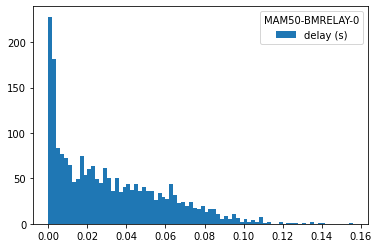

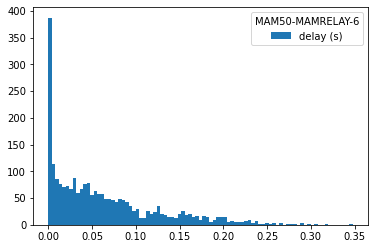

In [52]:

plt.hist(bins=hist.binedges, x=hist.binedges[:-1], weights=hist.binvalues, label="delay (s)")
plt.legend(title=runPrefix)
plt.show()

plt.hist(bins=hist2.binedges, x=hist2.binedges[:-1], weights=hist2.binvalues, label="delay (s)")
plt.legend(title=run2Prefix)
plt.show()

In [31]:
str(100-energyConsumption2Sum/energyConsumptionSum*100) + '% ' + run2Prefix + ' energy efficiency compared to ' + runPrefix

'2.005458952568432% MAM50-MAMRELAY-6 energy efficiency compared to MAM50-BMRELAY-0'

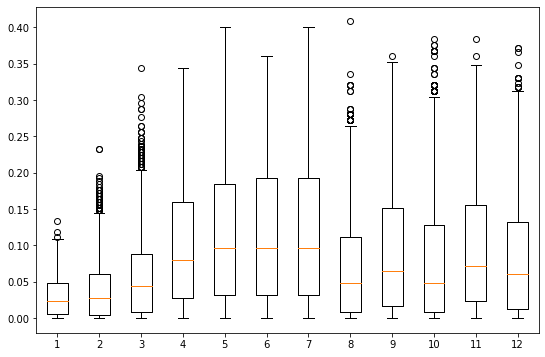

In [59]:
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

def explodeHistogramData(histogram):
    a = []

    i = 0
    for aa in histogram.binedges[:-1]:
        for j in range(1,histogram.binvalues[i].astype(np.int)):
            a.append(aa)
        i = i + 1
    return a

bmesh2mpsData = explodeHistogramData(getHistogramData(histogramName='endToEndDelay:histogram', 
                        runData=getRunData(findBluetoothRelayRun(speed=2, configName='MAM50-BMRELAY'))))
    
data_to_plot_2ms = [bmesh2mpsData]

for d in allDeltas[1:]:
    data_to_plot_2ms.append(explodeHistogramData(getHistogramData(histogramName='endToEndDelay:histogram', 
                        runData=getRunData(findMAMRelayRun(speed=2, delta=d, configName='MAM50-MAMRELAY')))))

# Create the boxplot
bp = ax.boxplot(data_to_plot_2ms)

# Save the figure
fig.savefig('fig1.png', bbox_inches='tight')

In [33]:
#TODO mhub data received bar chart. energy draw bar chart.